In [148]:

#https://www.kaggle.com/code/vjchoudhary7/kmeans-clustering-in-customer-segmentation/input

#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization


# Any results you write to the current directory are saved as output.

In [149]:
#Import the dataset
dataset = pd.read_csv('./data/Mall_Customers.csv')

#Exploratory Data Analysis
#As this is unsupervised learning so Label (Output Column) is unknown

dataset.head(10) #Printing first 10 rows of the dataset


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [150]:
#total rows and colums in the dataset
dataset.shape

(200, 5)

In [151]:
dataset.info() # there are no missing values as all the columns has 200 entries properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [152]:
#Missing values computation
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [153]:
dt = pd.merge(dataset, pd.get_dummies(dataset["Gender"], dtype="int"), left_index=True, right_index=True)
dt.drop(columns=["Gender", "Male"], inplace=True, errors="ignore")
dt

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1
...,...,...,...,...,...
195,196,35,120,79,1
196,197,45,126,28,1
197,198,32,126,74,0
198,199,32,137,18,0


In [154]:
dt.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female
CustomerID,1.000000,-0.026763,0.977548,0.013835,-0.057400
Age,-0.026763,1.000000,-0.012398,-0.327227,-0.060867
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,-0.056410
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,0.058109
Female,-0.057400,-0.060867,-0.056410,0.058109,1.000000


In [155]:
### Feature sleection for the model
#Considering only 2 features (Annual income and Spending Score) and no Label available
#X= dataset.iloc[:, [3,4]].values
X = dt[["Annual Income (k$)", "Spending Score (1-100)"]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [156]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

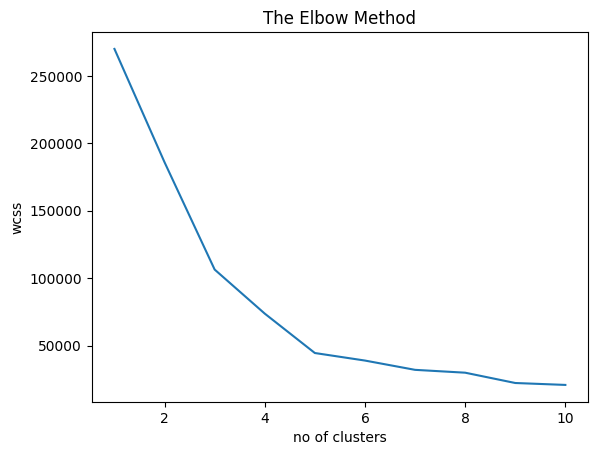

In [157]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [158]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=5

#Model Build
kmeansmodel = KMeans(n_clusters= 6, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.
#This use case is very common and it is used in BFS industry(credit card) and retail for customer segmenattion.

In [159]:
X = X.values

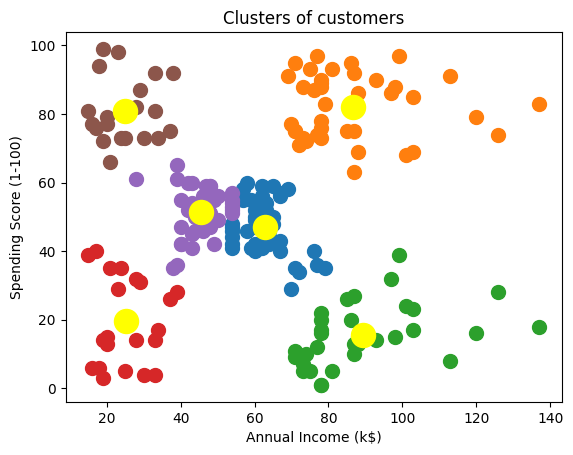

In [160]:
#Visualizing all the clusters 
# Algo raro?


# bucle for!
#plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
#plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
for i in range(len(kmeansmodel.cluster_centers_)):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 100, label = f'Cluster {str(i+1)}')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
#plt.legend()
plt.show()


In [161]:
kmeans.cluster_centers_

array([[ 62.23404255,  47.55319149],
       [ 77.58823529,  88.52941176],
       [ 79.70833333,  14.29166667],
       [ 28.18181818,  33.27272727],
       [ 25.0952381 ,  80.04761905],
       [124.        ,  81.75      ],
       [ 46.38888889,  52.13888889],
       [ 24.58333333,   9.58333333],
       [109.7       ,  22.        ],
       [ 86.66666667,  76.16666667]])

In [162]:
###Model Interpretation 
#Cluster 1 (Red Color) -> earning high but spending less
#cluster 2 (Blue Colr) -> average in terms of earning and spending 
#cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]
#cluster 4 (cyan Color) -> earning less but spending more
#Cluster 5 (magenta Color) -> Earning less , spending less


######We can put Cluster 3 into some alerting system where email can be send to them on daily basis as these re easy to converse ######
#wherein others we can set like once in a week or once in a month

In [163]:
# Analisis: para cada cluster, calcular la media, mediana, std, min, max... 
# % de observaciones en cada cluster 
# dt una columna con el cluster al que pertenece esa persona
dt["cluster"] = kmeansmodel.labels_

In [164]:
y_kmeans

array([3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 4, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 4, 5, 4, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [165]:
kmeansmodel.predict(X)

c:\Users\Jonatan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 4, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 4, 5, 4, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [166]:
dt["cluster"] = dt["cluster"]+1
stat = dt.drop(columns="CustomerID").groupby("cluster").agg(["mean", "median", "std", "min", "max", "count"])

In [167]:
stat.T

cluster                                1           2           3          4  \
Age                    mean    41.836735   32.692308   41.000000  44.142857   
                       median  46.000000   32.000000   41.500000  45.000000   
                       std     16.215151    3.728650   11.036596  13.089254   
                       min     18.000000   27.000000   19.000000  19.000000   
                       max     68.000000   40.000000   59.000000  67.000000   
                       count   49.000000   39.000000   32.000000  21.000000   
Annual Income (k$)     mean    62.734694   86.538462   89.406250  25.142857   
                       median  62.000000   79.000000   86.500000  24.000000   
                       std      5.840860   16.312485   16.612975   7.226934   
                       min     54.000000   69.000000   71.000000  15.000000   
                       max     79.000000  137.000000  137.000000  39.000000   
                       count   49.000000   39.000000   32.000000  21.000000   
Spending Score (1-100) mean    46.918367   82.128205   15.593750  19.523810   
                       median  47.000000   83.000000   15.000000  15.000000   
                       std      7.407307    9.364489    8.936548  12.769569   
                       min     29.000000   63.000000    1.000000   3.000000   
                       max     60.000000   97.000000   39.000000  40.000000   
                       count   49.000000   39.000000   32.000000  21.000000   
Female                 mean     0.591837    0.538462    0.437500   0.619048   
                       median   1.000000    1.000000    0.000000   1.000000   
                       std      0.496587    0.505035    0.504016   0.497613   
                       min      0.000000    0.000000    0.000000   0.000000   
                       max      1.000000    1.000000    1.000000   1.000000   
                       count   49.000000   39.000000   32.000000  21.000000   

cluster                                5          6  
Age                    mean    43.820513  24.850000  
                       median  47.000000  23.000000  
                       std     16.594025   5.029126  
                       min     18.000000  18.000000  
                       max     70.000000  35.000000  
                       count   39.000000  20.000000  
Annual Income (k$)     mean    45.512821  24.950000  
                       median  46.000000  23.500000  
                       std      5.632947   7.287155  
                       min     28.000000  15.000000  
                       max     54.000000  38.000000  
                       count   39.000000  20.000000  
Spending Score (1-100) mean    51.512821  81.000000  
                       median  52.000000  78.000000  
                       std      7.018291   9.514532  
                       min     35.000000  66.000000  
                       max     65.000000  99.000000  
                       count   39.000000  20.000000  
Female                 mean     0.589744   0.600000  
                       median   1.000000   1.000000  
                       std      0.498310   0.502625  
                       min      0.000000   0.000000  
                       max      1.000000   1.000000  
                       count   39.000000  20.000000